# Geometric modelling 1 

The geometric model of a robot is a set of equations describing the robot's geometry. This enables for instance to calculate the end-effector's position in the workspace based on the joint angles. There are 2 kinds of geometric models:

- Direct Geometric Model (DGM) : given joint positions, it gives the position of the end-effector (tool, hand, foot, etc.) with respect to the robot's base 

- Inverse Geometric Model (IGM) : given an end-effector position (and orientation), it gives the joint positions 

The joint positions are usually denoted by $q$ and belong to __joint space__ which is the space of robot configurations. The end-effector's pose is denoted $p$ and belongs to the __task space__, or cartesian space, typically $\mathbb{R}^{2}$ or $\mathb{R}^{3}$. So the geometric model is in fact a mapping between the joint space and the task space. We will introduce these concepts more concretely with examples. 

Consider a simple arm consisting of 1 revolute joint and 1 link. One way to describe the robot configuration is to use the joint angle $q\in[0,2\pi[$, which is a joint space description and the joint space is the interval $[0,2\pi[$. Knowing $q$, the DGM enables to find the end-effector's position $p$ in the task space ($x$ and $y$ coordinates) with respect to a fixed reference coordinate frame attached to the base. The DGM equations in this case are

$$
x_p = L \cos(q) \\
y_p = L \sin(q)
$$

where $(x_p,y_p)$ are the cartesian coordinates of the end-effector and $L$ is the length of the link. The same equations can be expressed more compactly as 

$$
p = DGM(q)
$$

where $DGM$ is a function taking a joint angle $q$ as an input and outputs a cartesian position $p=(x_p,y_p)$ expressed in the base frame. It is implemented in python as follow

In [1]:
import numpy as np

# Define the link length
L = 1.

# Function corresponding to the direct geometric model
def DGM(q):
    '''
    Input : joint angle (in rad)
    Output : end-effector position (in m)
    '''
    
    x_p = L*np.cos(q)
    y_p = L*np.sin(q)
    
    p = np.array([x_p, y_p])
    
    return p

# Test the DGM and display the result
q = 1.7
p = DGM(q)
print("The end-effector position corresponding to q = "+str(q)+" is : p = "+str(p))

The end-effector position corresponding to q = 1.7 is : p = [-0.12884449  0.99166481]


__Question__ : what is the task space of the 1R robot ? (Hint: it is a subset of the cartesian plane $\mathbb{R}^{2}$)

The IGM solves the converse problem: given an end-effector position (task space), it returns the corresponding position. The IGM is derived by inverting the DGM equations, i.e. by expressing $q$ in terms of $p$. The IGM reads

$$
x_p = L cos(q) \\
y_p = L sin(q)
$$

Assuming $cos(q) \neq 0$ we can divide the second equation by the first equation

$$
\frac{y_p}{x_p} = \frac{\sin(q)}{\cos(q)} = \tan(q)\\
$$

Therefore the IGM reads

$$
q = tan^{-1}(\frac{y_p}{x_p})
$$

The following function implements the IGM

In [2]:
# Function corresponding to the inverse geometric model
def IGM(p):
    '''
    Input : end-effector position (in m)
    Output : joint angle (in rad)
    '''
    
    x_p = p[0]
    y_p = p[1]
    
    q = np.arctan2(y_p, x_p)
    
    return q

# Test the DGM and display the result
p = np.array([0.3, 0.5])
q = IGM(p)
print("The joint position corresponding to p = "+str(p)+" is : q = "+str(q))

The joint position corresponding to p = [0.3 0.5] is : q = 1.0303768265243125


__Question__ : For which value(s) $q$ do we have $cos(q) = 0$ ? In this case, can we still use the IGM we derived previously in order to calculate $q$ ? 

Now we import a function to visualize the robot in various configurations

Now let us summarize the geometric model of the 1R robot into a python class

In [13]:
# Class for the geometric model of the 2R robot
class GeometricModel1R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L):
        ''' 
        Initialize model parameters
        '''
        self.L = L
    
    def DGM(self, q):
        '''
        Input : joint angle (in rad)
        Output : end-effector position (in m)
        '''
        x_p = L*np.cos(q)
        y_p = L*np.sin(q)
        p = np.array([x_p, y_p])
        return p

    def IGM(self, p):
        '''
        Input : end-effector position (in m)
        Output : joint angle (in rad)
        '''
        x_p = p[0]
        y_p = p[1]
        q = np.arctan2(y_p, x_p)
        return q

Now assume that we are given a sequence of joint positions $q_1, ..., q_n$. We want to calculate the corresponding end-effector trajectory in the task space, namely $p_1, ..., p_n$. Using the `GeometricModel1R` class defined above, fill out the code below to generate this sequence of end-effector positions.

'\nTo be completed\n'

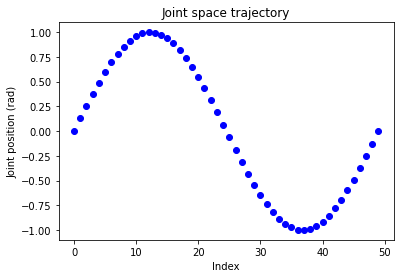

In [15]:
import matplotlib.pyplot as plt

# Number of steps in the trajectory
N = 50

# Define the joint space trajectory 
q = np.sin(np.linspace(0,1,N)*2*np.pi)

# This plots the sequence q_1, ..., q_n
plt.plot(q, 'bo')
plt.title("Joint space trajectory")
plt.xlabel("Index")
plt.ylabel("Joint position (rad)")

# Create `GeometricModel1R` object
    ### 
    ### To be completed
    ###

# Calculate the sequence p_1, ..., p_n 
    ### 
    ### To be completed
    ###

# Plot the sequence p_1, ..., p_n (plot x and y separately)
    ### 
    ### To be completed
    ###

Now let us derive the DGM and IGM of the 2R planar robot (2 links, 2 revolute joints). We will derive the maths together and you will have to implement the DGM and IGM functions by yourself ! First we rxpress the position of joint $2$ in the fixed coordinate frame attached to joint $1$ (the robot's base) :

$$
x_2 = L_1 \cos(q_1) \\
y_2 = L_1 \sin(q_1)
$$

Then we get the DGM as 

$$
x_p = L_1 \cos(q_1) + (L_1 + L_2) \cos(q_2) \\
y_p = L_1 \sin(q_1) + (L_1 + L_2) \sin(q_2)
$$

Expressing the IGM is a bit more complicated: find $(q_1,q_2)$

Teach matrix form + matrix inversion with numpy

PD control to compensate gravity 1dof : introduce PD control
PD control for 1 dof track circle : PD+

Question 1: derive the equations for the 2DoF. 
Question 2: create 2 robots, place them (base) / initialize, 1 block . Target motion: move block left/right. Find the joint trajectories achieving that (using IGM)


__Question__ : Write the GeometricModel2R class. You need to implement the DGM and IGM functions as for the GeometricModel1R class.

In [ ]:
# Class for the geometric model of the 2R robot
class GeometricModel2R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L1, L2):
        ''' 
        Initialize model parameters
        '''
        self.L1 = L1
        self.L2 = L2
        
    def DGM(self, q1, q2):
        '''
        Direct geometric model
        Input : joint angle (in rad)
        Output : end-effector position (in m)
        '''
        x_p = L*np.cos(q)
        y_p = L*np.sin(q)
        p = np.array([x_p, y_p])
        return p

    def IGM(self, p):
        '''
        Inverse geometric model
        Input : end-effector position (in m)
        Output : joint angle (in rad)
        '''
        x_p = p[0]
        y_p = p[1]
        q = np.arctan2(y_p, x_p)
        return q

__Question__ : Now generate trajectories of your choice in the joint space (for instance you can define a $\sin$ as for the 1R example, but feel free to try out different trajectories). Plot them as done before, and calculate and plot the corresponding endeffector trajectory.

__Question__ : The other way around, now plot an end-effector trajectory you choose, calculate and plot the corresponding joint trajectories. 

In this notebook we've introduced the concepts of joint space and task space. We derived and implemented the geometric model of the 1R and 2R robots. However, this description is "static", in a sense that it doesn't take into account velocities. The next notebook introduces the kinematic model, which relates velocities in the joint space to end-effector velocities in the task space.